# 1) Solving the travelling salesman problem (TSP) for 7 cities

### Number of cities

In [1]:
n = 8

n =  8


### Distance between cities

In [2]:
function d = distanceMatrixCities(n)

    d = 100*rand(n);

    ## Fill diagonal with zeros
    i = 1;
    
    while(i<=n)
        d(i,i) = 0;
        i++;
    end
    
end

d = distanceMatrixCities(n)

d =

 Columns 1 through 7:

    0.00000    3.59152   95.36144   92.37760   71.48337   26.40333   89.61390
   71.34581    0.00000   89.84394   68.90490   51.13076   76.42235   51.58172
   80.70511    4.07355    0.00000   42.99062   61.34393   42.45345   95.34750
   59.45903    4.44465   14.67874    0.00000   97.69651   31.07195   91.97100
   34.14096   18.75333   20.23742    6.38930    0.00000   96.79442   23.28394
   43.38654   17.09750    3.64014   95.40571   83.69285    0.00000   62.95322
   26.14969   78.43030   71.10819   34.88576   99.66215   90.24996    0.00000
   51.07893   56.31958    8.76697   88.04210   67.51782   41.46424   93.95215

 Column 8:

   82.89528
    9.89980
   72.05509
   49.71889
   59.50201
   23.75451
   74.16349
    0.00000



## a) Initial population

### Population

In [3]:
pop = perms([1:n]);

In [4]:
size(pop)(1)

ans =  40320


### In the TSP, the last and first visited city had to be the same

In [6]:
function pop = firstlastcityTSP(pop)
    
    popCopy = zeros(size(pop)(1),size(pop)(2)+1);

    for i=1:size(pop)(1)

        popCopy(i,:) = [pop(i,:),pop(i,1)];

    end
    
    pop = popCopy;
    
end

In [7]:
%totalPop = firstlastcityTSP(pop = pop)
totalPop = pop;

### Size of the initial population for the genetic algorithm

In [8]:
sizeSubPop = 10 

sizeSubPop =  10


### Pick individuals from the total population randomly to create a generation

In [9]:
function subPop = createSubPopulation(totalPop,sizeSubPop)

    subPop = totalPop(randi(size(totalPop)(1),sizeSubPop,1),:);

end

subPop = createSubPopulation(totalPop,sizeSubPop)


subPop =

   6   7   5   3   4   1   2   8
   6   8   5   7   4   2   1   3
   4   1   7   2   5   8   3   6
   3   7   4   6   2   1   8   5
   2   3   4   1   7   5   8   6
   3   7   8   1   5   6   2   4
   5   2   6   1   3   8   7   4
   4   5   7   8   2   6   1   3
   1   5   2   7   6   4   3   8
   4   5   2   6   3   1   7   8



## b) Fitness calculation

### Total distance for all possible sequence of cities

In [10]:
function individuals = distanceCalculation(pop,d)
    
    daccs = zeros([size(pop)(1),size(pop)(2)+1]);

        for i = 1:(size(pop)(1))
            dacc = 0;

            for j = 1:(size(pop)(2)-1)
                dacc += d(pop(i,j),pop(i,j+1));
            end

            daccs(i,:) = [pop(i,:),dacc];
            
        end
    
    individuals{1} = pop;
    individuals{2} = daccs(:,size(daccs)(2));

end



In [11]:
## The first position of the array has the sequence of cities and the second position the total distance between cities
individuals = distanceCalculation(pop = subPop,d = d);

### Fitness function

In [12]:
function individuals = fitness(individuals)

    individuals{3} = individuals{2};

    for i=1:size(individuals{1})(1)

        individuals{3}(i,1) = 1/individuals{2}(i);

    end 

end

In [13]:
#The third position of the array includes the fitness of each individual
individuals = fitness(individuals);

## c) Choosing parents to create the next generation of individuals

In [14]:
function [individuals,parents] = chooseParents(individuals)

    individuals{4} = individuals{3};

    individualsCopy = individuals;

    #probParent = individuals{3}/sum(individuals{3})

    #First best-fitted individual

    [maxVal1,maxIndex1] = max(individuals{3});

    #Second best-fitted individual
    individualsCopy{3}(maxIndex1) = -1*individualsCopy{3}(maxIndex1);
    [maxVal2,maxIndex2] = max(individualsCopy{3});

    #Create a column with binary variables that takes the value 1 if the individual is parent or zero, otherwise. 
    individuals{4}=zeros(size(individuals{1})(1),1);

    individuals{4}(maxIndex1) = 1;
    individuals{4}(maxIndex2) = 1;

end

In [15]:
#The fourth position of the array shows which individuals were selected as parents
chooseParents(individuals);

In [16]:
function parents = createParents(individuals)

individuals = chooseParents(individuals);

parents = {:};

count = 1;

for i = 1:size(individuals{4})(1)

    if individuals{4}(i) == 1

    parents{1}(count,:) = individuals{1}(i,:);
    parents{2}(count,:) = individuals{2}(i,:);
    parents{3}(count,:) = individuals{3}(i,:);
    
    count++;

    end

end


end

In [17]:
#This array includes the information of parents (1: sequence of cities, 2: total distance, 3: fitness)
parents = createParents(individuals)

parents =
{
  [1,1] =

     6   7   5   3   4   1   2   8
     6   8   5   7   4   2   1   3

  [1,2] =

     298.79
     320.59

  [1,3] =

     0.0033468
     0.0031192

}



## d) Crossover

### Check if a gene (city) exist in a chromosome (sequence of cities)

In [18]:
function geneExist = containGene(child,gene)

    geneExist = false;

    for i=1:length(child)

        if child(i) == gene

            geneExist = true;

        end

    end

end

### Crossover between the two parents

In [19]:
function child = crossover(parents)


    nParents = size(parents{1})(1);
    chromosomeSize = size(parents{1})(2);

    %Select a random crossover point
    indexCO = randi([2,chromosomeSize],1,1);

    %Select the parent (parentChromosome1) that is used to start the crossover
    parentCO = randi(nParents,1,1);
    chromosomeParent1 = parents{1}(parentCO,:);
    chromosomeParent2 = parents{1}(1,:);

    if parentCO == 1
        chromosomeParent2 = parents{1}(2,:);
    end

    child = chromosomeParent1;

    #Genes from parent 1
    for i=1:length(child)

        if i < indexCO
            child(i) = 0;
        end

    end

    #Genes from parent 2
    genePosition = 1;
    for i=1:(indexCO-1)

        implant = false;

        while implant == false 
            geneExist = containGene(child,chromosomeParent2(genePosition));

            if geneExist == true
                genePosition++;
                implant = false;

            else
                child(i) = chromosomeParent2(genePosition);
                implant = true;
                genePosition++;
            end

        end

    end
    
    %chromosomeParent1
    %chromosomeParent2
    %indexCO
    %child


end

In [20]:
child = crossover(parents)

child =

   6   5   7   3   4   1   2   8



## e) Mutation

In [25]:
function child = mutation(child, pm)
    
    childCopy = child;
    chromosomeSize = length(child);

    %Select two random mutation points
    indexM1 = randi([1,chromosomeSize],1,1);
    indexM2 = randi([1,chromosomeSize],1,1);
    
    %Mutation is done with a 'pm'% chance
    mutationProbThreshold = rand(1);
    
    if mutationProbThreshold <= pm
    
        childCopy(indexM1) = child(indexM2);
        childCopy(indexM2) = child(indexM1);
        
    end
    
    child = childCopy;
    
    %childCopy
    %child

end

In [26]:
child
child = mutation(child, pm = 0.5) # Mutation with a 50% probability

## f) Next Generation  (replacement)

### Size of the next generation 

In [27]:
sizeGeneration = 1*sizeSubPop

### Check if the child exists in a generation

In [28]:
function childExist = containChild(child,children)
    
    childExist = false;
    
    for i=1:size(children)(1)
    
        counterEqualGenes = 0;
        
        for j= 1:length(children(i,:))
        
            if children(i,:)(j) == child(j)
                counterEqualGenes++;
            end
     
        end
        
        if counterEqualGenes == length(child)
            childExist = true;
        end


    end

end

### Function to create the next generations of individuals

In [29]:
function generations = createNewGeneration(nGenerations,sizeGeneration,individuals,d,pm)
    
    
    #This process is iteratively repeated for each generation
    generations = {:};
    
    t=cputime;
    
    for i=1:nGenerations      
        
        
        
        individuals = distanceCalculation(individuals{1},d);

        individuals = fitness(individuals);

        parents = createParents(individuals);

        child = crossover(parents);

        child = mutation(child,pm);
        
        if i == 1
            
            #Information about the new generation
            individuals(4) = min(individuals{2});
            individuals{5} = cputime-t;
            generations{i} = individuals;
            
        end
               
        if i > 1
        
            #This process is repeated until reaching the number of individuals in a generation
            newGeneration = {:};
        
            %newGeneration{2} = zeros(sizeGeneration,length(child));

            newGeneration{1}(1,:) = child;

            for j=1:sizeGeneration

                 newChild = mutation(crossover(parents),pm);

                 #Children are all different
                 while(containChild(child = newChild, children = newGeneration{1}))

                     newChild = mutation(crossover(parents),pm);

                 end

                 newGeneration{1}(j,:) = newChild;

            end

            #Information about the new generation
            individuals  = distanceCalculation(newGeneration{1},d);
            individuals = fitness(individuals);
            individuals(4) = min(individuals{2});
            individuals{5} = cputime-t;
            generations{i} = individuals;
        
        end
        

        


        
    end

end

# 2) Analyses

## First and second generations

In [62]:
newGeneration12 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = individuals, d = d, pm = 0.2);

In [63]:
newGeneration12

newGeneration12 =
{
  [1,1] =
  {
    [1,1] =

       4   5   7   6   3   1   2   8
       6   5   7   3   4   1   2   8
       6   7   5   4   2   8   3   1
       6   7   5   8   4   2   1   3
       6   7   5   4   8   2   1   3
       6   7   5   8   4   3   1   2
       6   7   5   3   4   1   2   8
       6   5   7   4   3   1   2   8
       6   1   5   8   4   2   7   3
       6   5   8   7   4   2   1   3
       6   5   7   4   1   3   2   8
       6   7   5   4   2   8   1   3
       6   7   5   4   1   2   8   3
       6   8   5   7   4   2   1   3
       8   5   6   7   4   2   1   3

    [1,2] =

       309.07
       294.03
       272.82
       481.31
       441.75
       409.13
       298.79
       250.74
       389.55
       443.18
       310.66
       329.79
       250.72
       320.59
       433.30

    [1,3] =

       0.0032355
       0.0034011
       0.0036654
       0.0020777
       0.0022637
       0.0024442
       0.0033468
       0.0039882
       0.0025671
       

## Second and Third generation

In [59]:
newGeneration23 = createNewGeneration(nGenerations = 2, sizeGeneration = sizeGeneration,individuals = newGeneration12{2}, d = d, pm = 0.8);

In [61]:
newGeneration23

newGeneration23 =
{
  [1,1] =
  {
    [1,1] =

       4   5   7   6   3   1   2   8
       6   5   7   3   4   1   2   8
       6   7   5   4   2   8   3   1
       6   7   5   8   4   2   1   3
       6   7   5   4   8   2   1   3
       6   7   5   8   4   3   1   2
       6   7   5   3   4   1   2   8
       6   5   7   4   3   1   2   8
       6   1   5   8   4   2   7   3
       6   5   8   7   4   2   1   3
       6   5   7   4   1   3   2   8
       6   7   5   4   2   8   1   3
       6   7   5   4   1   2   8   3
       6   8   5   7   4   2   1   3
       8   5   6   7   4   2   1   3

    [1,2] =

       309.07
       294.03
       272.82
       481.31
       441.75
       409.13
       298.79
       250.74
       389.55
       443.18
       310.66
       329.79
       250.72
       320.59
       433.30

    [1,3] =

       0.0032355
       0.0034011
       0.0036654
       0.0020777
       0.0022637
       0.0024442
       0.0033468
       0.0039882
       0.0025671
       

## 4 generations

In [64]:
newGenerations1234 = createNewGeneration(nGenerations = 4, sizeGeneration = sizeGeneration,individuals = individuals, d = d, pm = 0.2);
newGenerations

newGenerations =
{
  [1,1] =
  {
    [1,1] =

       6   7   5   3   4   1   2   8
       6   8   5   7   4   2   1   3
       4   1   7   2   5   8   3   6
       3   7   4   6   2   1   8   5
       2   3   4   1   7   5   8   6
       3   7   8   1   5   6   2   4
       5   2   6   1   3   8   7   4
       4   5   7   8   2   6   1   3
       1   5   2   7   6   4   3   8
       4   5   2   6   3   1   7   8

    [1,2] =

       298.79
       320.59
       389.36
       400.16
       482.54
       474.87
       434.82
       466.63
       414.21
       440.99

    [1,3] =

       0.0033468
       0.0031192
       0.0025683
       0.0024990
       0.0020724
       0.0021058
       0.0022998
       0.0021430
       0.0024142
       0.0022676

    [1,4] =  298.79
    [1,5] =  0.0070210
  }

  [1,2] =
  {
    [1,1] =

       6   7   5   3   4   1   2   8
       6   8   5   7   4   2   1   3
       6   7   5   4   1   2   8   3
       6   7   5   2   8   4   1   3
       6   7   5   8  

# 3) Computational time, generations and optimality

#### Optimal value

In [65]:
function [opt,t]=OptimalDistanceCalculation(pop,d)

    t=cputime;

    opt = min(distanceCalculation(pop,d){2});

    t = cputime-t;

end

In [66]:
[optimalDistance, cputime] = OptimalDistanceCalculation(pop = totalPop, d = d)

optimalDistance =  136.81
cputime =  9.0846


#### Plot computational time and optimality

In [70]:
function OptimalityAndGenerations = tableOptimalityAndNGenerations(minNGenerations,maxNGenerations, sizeGeneration,individuals,d,pm)

    newGenerations = createNewGeneration(nGenerations = maxNGenerations, sizeGeneration = sizeGeneration,individuals = individuals, d = d, pm = pm);

    OptimalityAndGenerations = zeros(maxNGenerations-minNGenerations+1,2);

    count = 1;
    
    for i = minNGenerations:maxNGenerations;

        OptimalityAndGenerations(count,1) = i;
        OptimalityAndGenerations(count,2) = newGenerations{i}{4};
        count++;

    end

end

In [71]:
OptimalityAndGenerations18 = tableOptimalityAndNGenerations(minNGenerations = 1,maxNGenerations = 8, sizeGeneration = 15,individuals = newGeneration1{1}, d = d, pm = 0.2)

OptimalityAndGenerations18 =

     1.0000   298.7938
     2.0000   250.7220
     3.0000   223.5799
     4.0000   223.5799
     5.0000   223.5799
     6.0000   223.5799
     7.0000   154.8865
     8.0000   154.8865



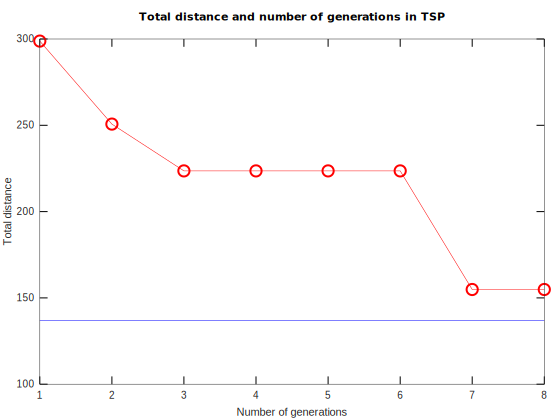

In [72]:
plot([OptimalityAndGenerations18(:,1)], [OptimalityAndGenerations18(:,2)], 'o-r');
title ("Total distance and number of generations in TSP");
xlabel ("Number of generations");
ylabel ("Total distance");
hold on;
plot([min(OptimalityAndGenerations18(:,1)),max(OptimalityAndGenerations18(:,1))],[optimalDistance,optimalDistance], 'b')
hold off;

#### Plot computational time and number of generations

In [73]:
function CPUTimeAndGenerations = tableCPUTimeAndNGenerations(minNGenerations,maxNGenerations, sizeGeneration,individuals,d,pm)
    
    newGenerations = createNewGeneration(nGenerations = maxNGenerations, sizeGeneration = sizeGeneration,individuals = individuals, d = d, pm = pm);
    
    CPUTimeAndGenerations = zeros(maxNGenerations-minNGenerations+1,2);

    count = 1;
    
    for i = minNGenerations:maxNGenerations;

        CPUTimeAndGenerations(count,1) = i;
        CPUTimeAndGenerations(count,2) = newGenerations{i}{5};
        count++;

    end

end

In [74]:
CPUTimeAndGenerations18 = tableCPUTimeAndNGenerations(minNGenerations = 1,maxNGenerations = 8, sizeGeneration = 15,individuals = newGeneration1{1}, d = d, pm = 0.2)

CPUTimeAndGenerations18 =

   1.0000000   0.0071040
   2.0000000   0.0880780
   3.0000000   0.3612660
   4.0000000   0.5209970
   5.0000000   0.8883700
   6.0000000   1.1178850
   7.0000000   1.5096850
   8.0000000   1.7771990



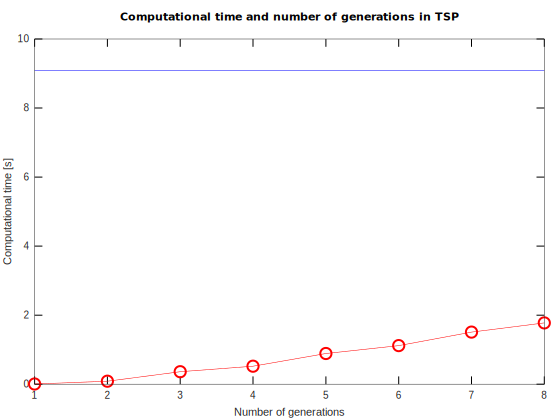

In [75]:
plot([CPUTimeAndGenerations18(:,1)], [CPUTimeAndGenerations18(:,2)], 'o-r');
title ("Computational time and number of generations in TSP");
xlabel ("Number of generations");
ylabel ("Computational time [s]");
hold on;
plot([min(CPUTimeAndGenerations18(:,1)),max(CPUTimeAndGenerations18(:,1))],[cputime,cputime], 'b')
hold off;